In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv.zip')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
# returns the top 5 rows of the dataset
df.head() 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# returns the number of rows and columns of the dataset
df.shape

(253680, 22)

In [ ]:
# returns the name of all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# checking the number of missing values in the daataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Handling missing values 
# removing the rows having missing values
df.dropna(inplace = True)

In [ ]:
# Checking duplicates

duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [ ]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [ ]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


In [ ]:
# in our dataset the label is diabetes column

# This will return the label distribution count  
df['Diabetes_binary'].value_counts()

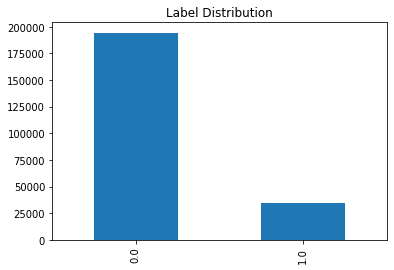

In [ ]:
# plotting the label distribution
df['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

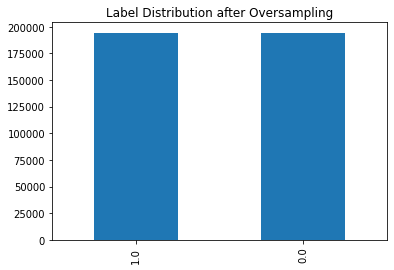

In [ ]:
# over sampling of the dataset to get a balanced dataset
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)

# plotting the new label distribution
df_new['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [ ]:
X = df_new.drop('Diabetes_binary', axis = 1) # features
y = df_new[['Diabetes_binary']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10)

In [ ]:
# Initializing the model
model_1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',min_samples_split=10, random_state=0)

# fitting the model on the train data
model_1.fit(X_train, y_train)

# predicting values on test data
predictions = model_1.predict(X_test)

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
94946,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
200007,1.0,1.0
248419,1.0,1.0
18062,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracies = {}
accuracy_1 = accuracy_score(y_test, predictions)
accuracies['Random Forest Classifier'] = accuracy_1

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 90.47

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     38705
         1.0       0.87      0.96      0.91     39046

    accuracy                           0.90     77751
   macro avg       0.91      0.90      0.90     77751
weighted avg       0.91      0.90      0.90     77751


**************************************************

Mean squared error : 0.09531710203084205

**************************************************

Root mean squared error : 0.30873467902204


Confusion Matrix for Random Forest Classifier


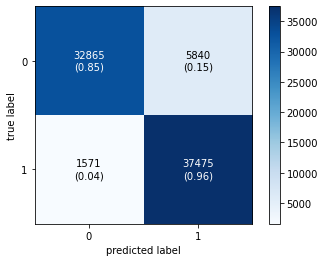

In [ ]:
 print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
# Initializing the model
model_2 = LogisticRegression()

# fitting the model on the train data
model_2.fit(X_train, y_train)

# predicting values on test data
predictions = model_2.predict(X_test)

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
94946,1.0,0.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
200007,1.0,1.0
248419,1.0,1.0
18062,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy_2
# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression : 72.78

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72     38705
         1.0       0.72      0.76      0.74     39046

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751


**************************************************

Mean squared error : 0.272240871500045

**************************************************

Root mean squared error : 0.5217670663237044


Confusion Matrix for Logistic Regression


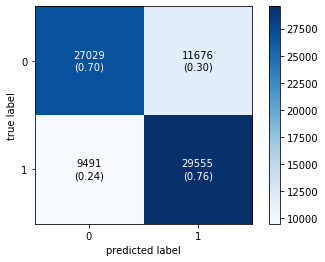

In [ ]:
print('Confusion Matrix for Logistic Regression')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
# Initializing the model

model_3 = DecisionTreeClassifier(max_depth = 3)

# fitting the model on the train data
model_3.fit(X_train, y_train)

# predicting values on test data
predictions = model_3.predict(X_test)

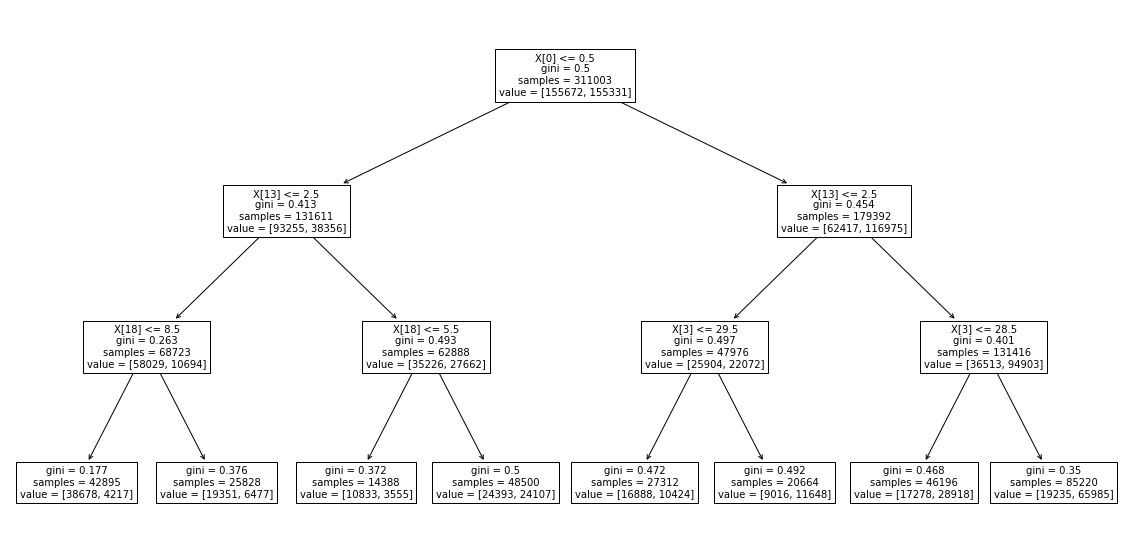

In [ ]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(model_3)
plt.show()

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
94946,1.0,0.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
200007,1.0,1.0
248419,1.0,1.0
18062,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_3 = accuracy_score(y_test, predictions)
accuracies['Decision Tree Classifier'] = accuracy_3

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Decision Tree Classifier : 70.06

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70     38705
         1.0       0.71      0.69      0.70     39046

    accuracy                           0.70     77751
   macro avg       0.70      0.70      0.70     77751
weighted avg       0.70      0.70      0.70     77751


**************************************************

Mean squared error : 0.2994045092667618

**************************************************

Root mean squared error : 0.5471786812977657


Confusion Matrix for Decision Tree Classifier


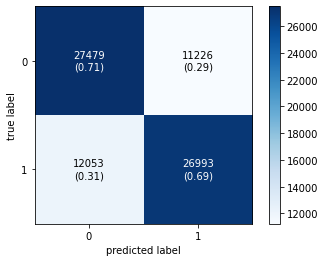

In [ ]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
# Initializing the model

model_4 = KNeighborsClassifier(n_neighbors = 5, p = 2)

# fitting the model on the train data
model_4.fit(X_train, y_train)

# predicting values on test data
predictions = model_4.predict(X_test)

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
94946,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
200007,1.0,1.0
248419,1.0,1.0
18062,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_4 = accuracy_score(y_test, predictions)
accuracies['KNeighborsClassifier'] = accuracy_4
  
# calculating the classification report 
classificationreport = classification_report(y_test, predictions)  

# calculating the mse
mse = mean_squared_error(y_test, predictions) 

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of K - Nearest Neighbors : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of K - Nearest Neighbors : 82.02

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79     38705
         1.0       0.76      0.94      0.84     39046

    accuracy                           0.82     77751
   macro avg       0.84      0.82      0.82     77751
weighted avg       0.84      0.82      0.82     77751


**************************************************

Mean squared error : 0.17975331506990264

**************************************************

Root mean squared error : 0.4239732480592409


Confusion Matrix for K - Nearest Neighbors


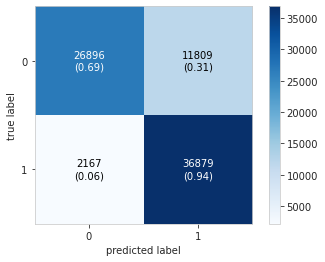

In [ ]:
print('Confusion Matrix for K - Nearest Neighbors')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

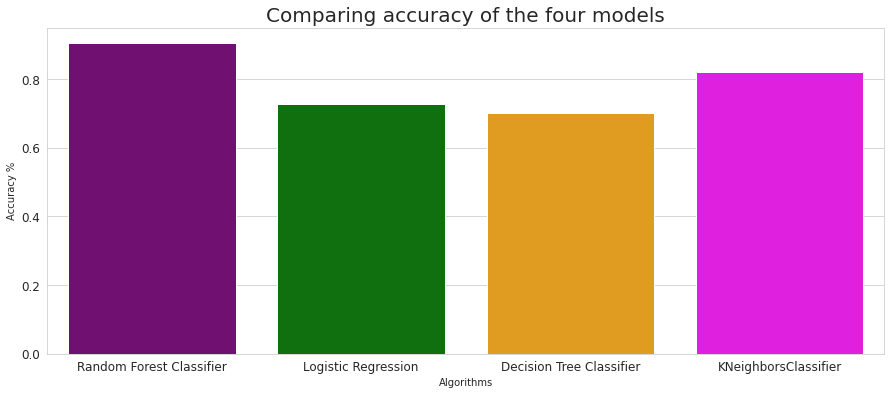

In [ ]:
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [ ]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,Random Forest Classifier,0.904683
3,KNeighborsClassifier,0.820247
1,Logistic Regression,0.727759
2,Decision Tree Classifier,0.700595


**Summary**
* Used oversampling method for imbalanced classification data.
* Random Forest Classifier models performs best fit for our dataset.
* Random Forest Classifer has the lowest Mean squared error : 0.095 and Root mean squared error : 0.308